## ~~BUSCO~~ Helixer Result Processing
### 4/15/25
### Update 6/29/25

In [10]:
import csv
import re
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
summary = pd.read_table('combined_summary.1.tsv', dtype={'Basename': str, 'Measure': str, 'Value': float})

summary_wider = summary.pivot(index="Basename", columns="Measure", values="Value")

# summary.head()
print(summary_wider.info())
summary_wider.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1195 entries, GCA_000004075.3 to GCA_965119375.1
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg Introns Per mRNA          1195 non-null   float64
 1   Gene Count                    1195 non-null   float64
 2   Mean CDS Length               1195 non-null   float64
 3   Mean Exons Length             1195 non-null   float64
 4   Mean mRNA Length              1195 non-null   float64
 5   Median CDS Length             1195 non-null   float64
 6   Median Exons Length           1195 non-null   float64
 7   Percent Genes with 0 Introns  1195 non-null   float64
dtypes: float64(8)
memory usage: 84.0+ KB
None


Measure,Avg Introns Per mRNA,Gene Count,Mean CDS Length,Mean Exons Length,Mean mRNA Length,Median CDS Length,Median Exons Length,Percent Genes with 0 Introns
Basename,,,,,,,,
GCA_000004075.3,5.08,21881.0,1256.16,1788.89,4200.22,1062.0,1605.0,0.1577
GCA_000218505.1,4.74,28628.0,1218.40,1588.26,2401.45,1038.0,1415.0,0.1736
GCA_000231095.3,4.67,27542.0,1253.95,1812.79,3654.80,1074.0,1651.0,0.1698
GCA_000258705.1,9.51,10222.0,1560.48,2434.51,4753.30,1245.0,2188.0,0.0101
GCA_000338895.3,4.30,38572.0,1185.66,1655.58,3320.95,990.0,1504.0,0.1755


In [136]:
summary.groupby('Measure').Value.mean()

Measure
Avg Introns Per mRNA                4.677381
Gene Count                      43716.517992
Mean CDS Length                  1198.903029
Mean Exons Length                1684.050460
Mean mRNA Length                 3890.841950
Median CDS Length                 983.486192
Median Exons Length              1498.117155
Percent Genes with 0 Introns        0.163095
Name: Value, dtype: float64

## Graphing and Plotting

### Helixers

In [72]:
print(ord('²'))
print(ord('³'))
print(chr(178))
print('\u00b0')

178
179
²
°


In [82]:
list(range(10)) + list(range(11,20))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19]

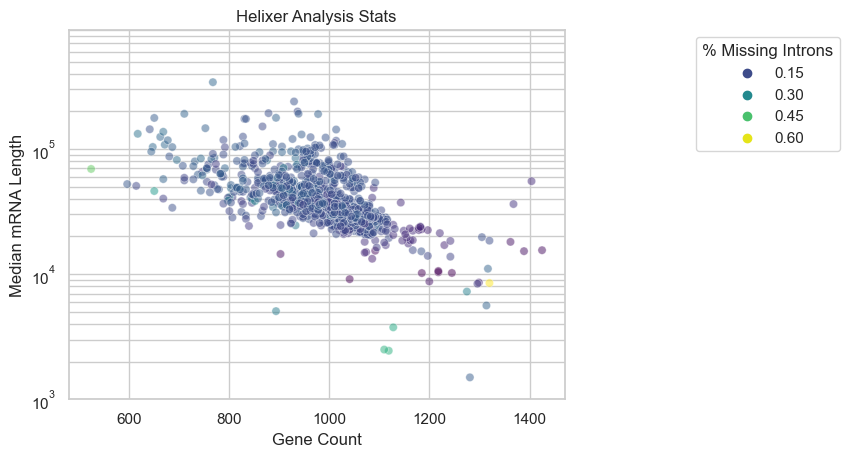

In [122]:
# plot scatterplot
sns.set_theme(style='whitegrid')

# fig, axes = plt.subplots(1, 1, figsize=(6,5))

# Scatter
sns.scatterplot(data = summary_wider, x="Median CDS Length", y="Gene Count", hue="Percent Genes with 0 Introns", palette="viridis", alpha=0.5)
plt.yscale("log")
plt.title("Helixer Analysis Stats")
plt.legend(title="% Missing Introns", bbox_to_anchor=(1.25, 1), loc="upper left")
plt.xlabel("Gene Count")
plt.ylabel("Median mRNA Length")
plt.yticks(list(range(1000,10000, 1000)) + list(range(10000, 100000, 10000)) + list(range(100000, 1000000, 100000)))

plt.savefig("Helixer_scatterplot.jpg")

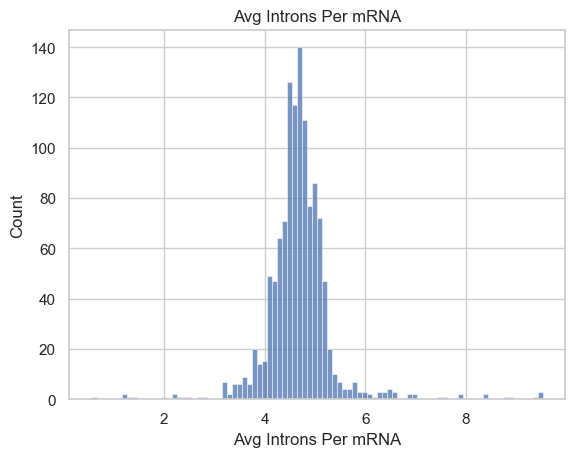

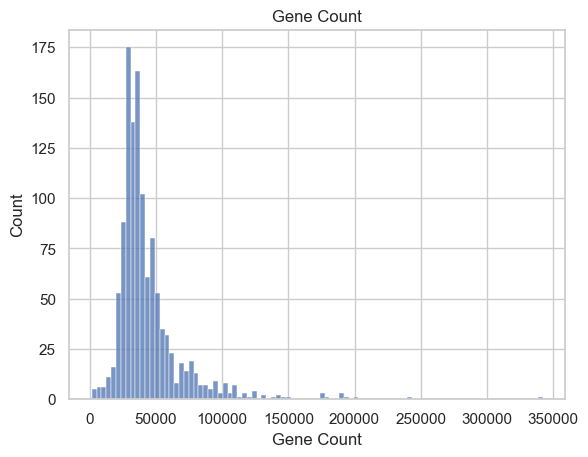

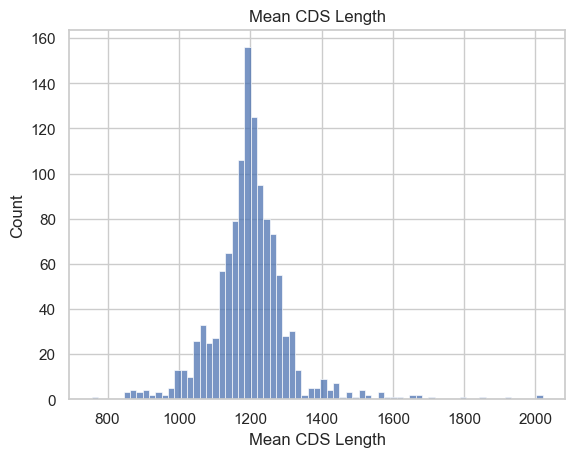

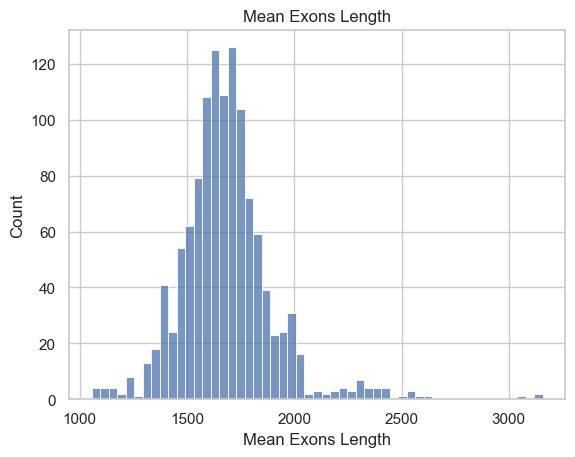

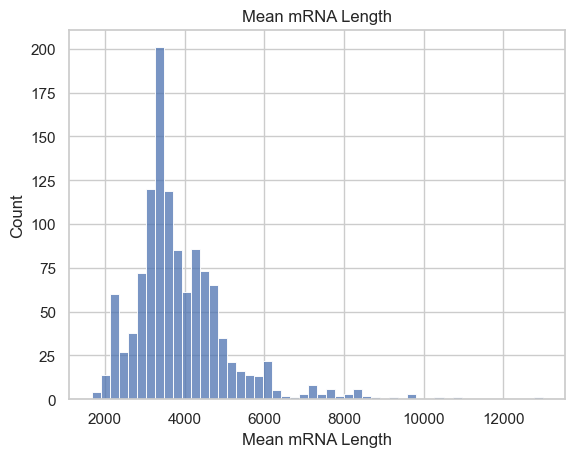

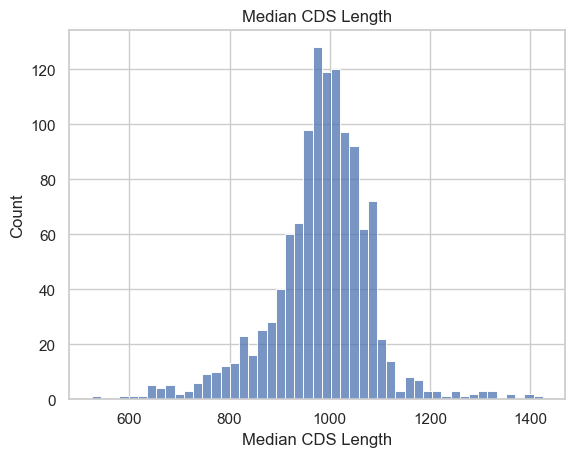

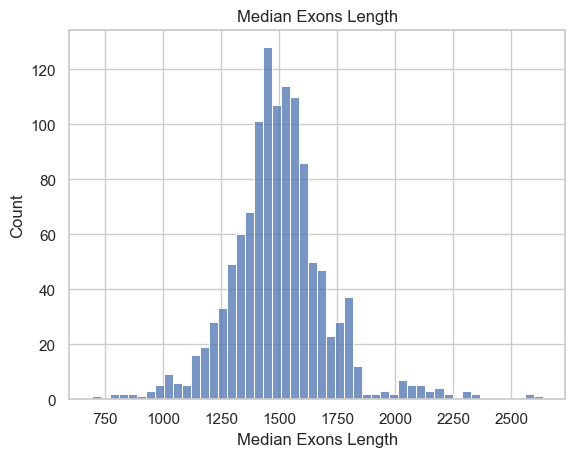

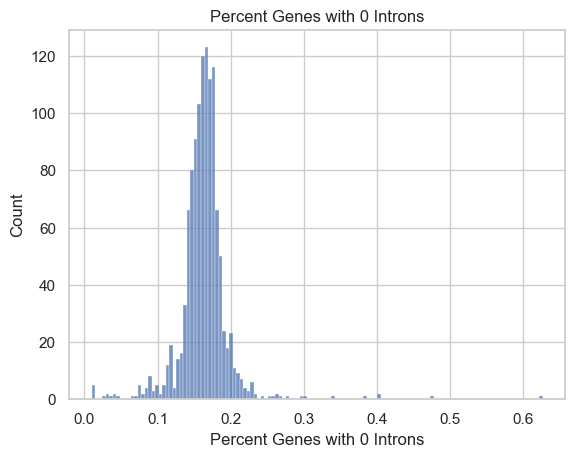

In [120]:
# Histograms for each metric
for metric in summary_wider.columns:
    sns.histplot(summary_wider, x=metric)
    plt.title(metric)
    plt.savefig("Helixer_histplot_{}.jpg".format(metric))
    plt.show()
# sns.histplot(summary_wider, x="Gene Count")

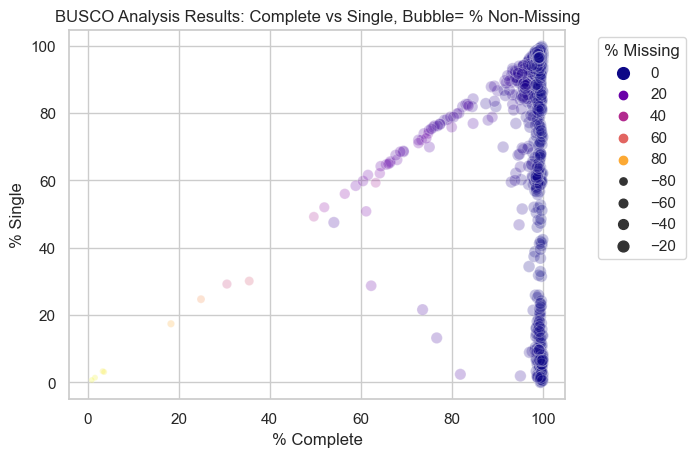

In [386]:
# Bubble chart 
sns.scatterplot(data = merged,
                x="Complete",
                y="Single",
                size=1 - merged["Missing"],
                hue="Missing",
                palette="plasma",
                alpha=0.24)

plt.title("BUSCO Analysis Results: Complete vs Single, Bubble= % Non-Missing")
plt.legend(title= "% Missing", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("% Complete")
plt.ylabel("% Single")

plt.savefig("Busco_scatter_old.jpg")
plt.show()

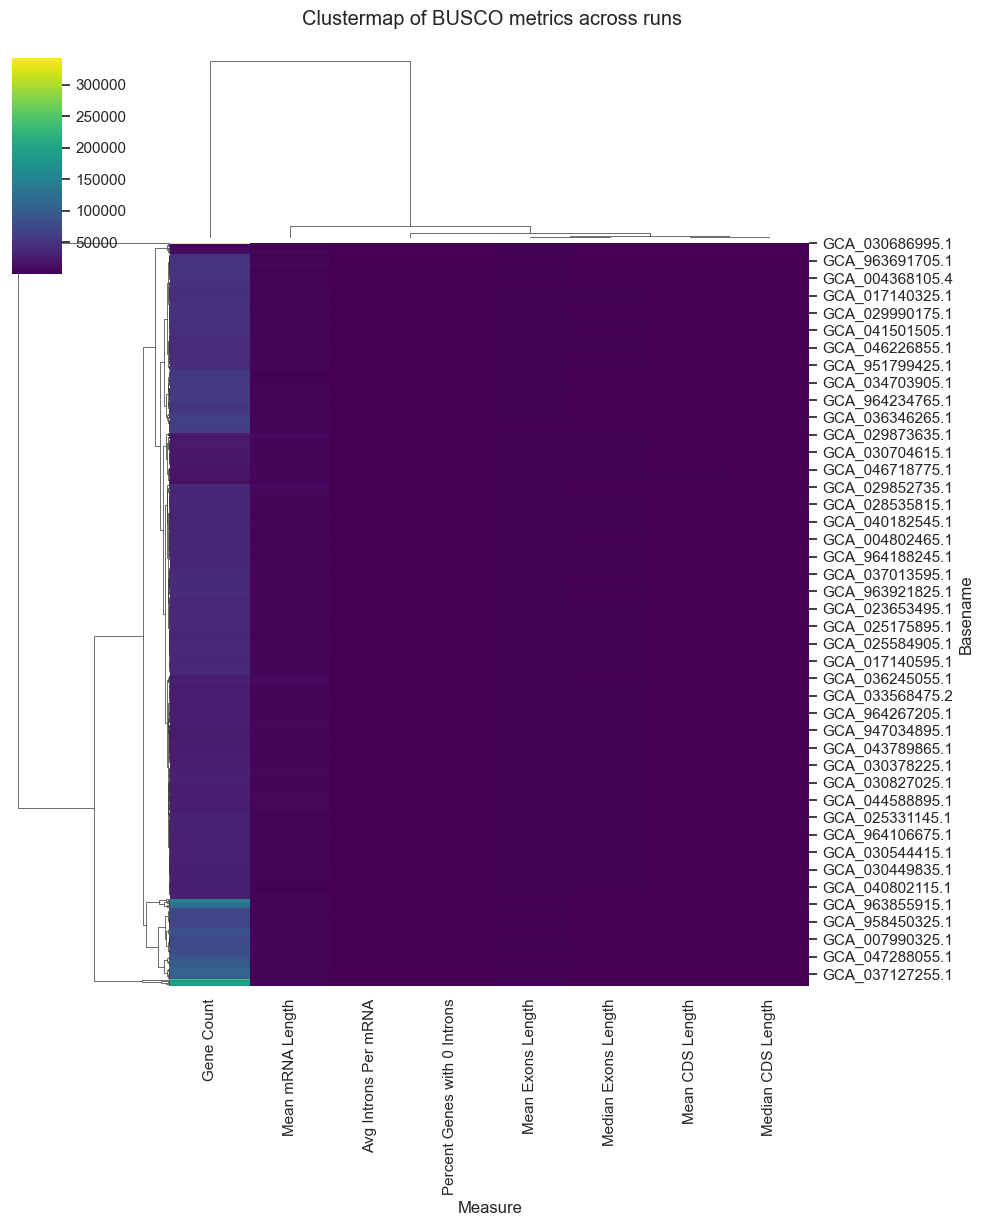

In [106]:
## Clustered Heatmap

sns.clustermap(
    summary_wider,
    metric="euclidean",
    method="average",
    cmap="viridis",
    figsize=(10,12)
)
plt.suptitle("Clustermap of BUSCO metrics across runs", y=1.02)
plt.savefig("Busco_clustermap_old.jpg")
plt.show()

### New BUSCOS

In [309]:
# Combine the New Stats with previous data to produce graph

# remove duplicates within new stats data
stats2 = stats2[~stats2.ID.isin(stats.ID)]

# Define file path and load dataset
file_path = "C:/users/truma/Documents/snake_busco/Metadata_taxonomy.tsv"
with open(file_path, encoding='utf8', errors='ignore') as buffer:
    taxonomy_tsv = pd.read_csv(buffer, sep='\t')
    taxonomy_tsv.columns = ['Assembly name', 'version', 'Species name', 'Common name', 'Ploidy=Chr',
       'haplotype', 'ID', 'Link (download)',
       'assembly quality (ie: Gold  draft  etc)', 'Sequencer Reads',
       'Assembly Method', 'Total Length (bp)', 'N50 Length (bp)', 'L50 (#)',
       'Contig (#)', 'Number of Gaps', 'genus', 'family', 'order', 'class',
       'phylum', 'group name', 'Link (FTP)', 'Publication (PUBMED ID)']

# Select ID column and species name column
primary = taxonomy_tsv[["ID", "Species name"]]
# Rename IDs column
primary.columns = ["ID", "Species name"]
print(primary.head())

# Merge with the stats dataset
# merged2 = primary.join(stats2.set_index("ID"), on="ID", how="right")
merged2 = pd.merge(primary, stats2, on="ID", how="right")
merged2.info()
merged2.head()

                ID                Species name
0  GCA_964605405.1  Heterocladium heteropterum
1  GCA_022834675.1              Ananas comosus
2  GCA_022316695.1           Camellia oleifera
3  GCA_963924305.1         Polygonum maritimum
4  GCA_037855405.1          Chlorella vulgaris
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            40 non-null     object 
 1   Species name  40 non-null     object 
 2   Complete      40 non-null     float64
 3   Single        40 non-null     float64
 4   Duplicated    40 non-null     float64
 5   Fragmented    40 non-null     float64
 6   Missing       40 non-null     float64
 7   Total         40 non-null     int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.6+ KB


,ID,Species name,Complete,Single,Duplicated,Fragmented,Missing,Total
0,GCA_010119995.1,Papaver somniferum,99.8,8.7,91.1,0.0,0.2,425
1,GCA_013389655.1,Chlamydomonas reinhardtii,78.3,77.6,0.7,14.1,7.6,425
2,GCA_019343435.1,Corylus heterophylla,96.2,94.8,1.4,1.6,2.2,425
3,GCA_019972055.1,Castanea crenata,98.8,96.2,2.6,0.9,0.3,425
4,GCA_020226455.1,Prunus salicina,93.8,80.9,12.9,0.9,5.3,425


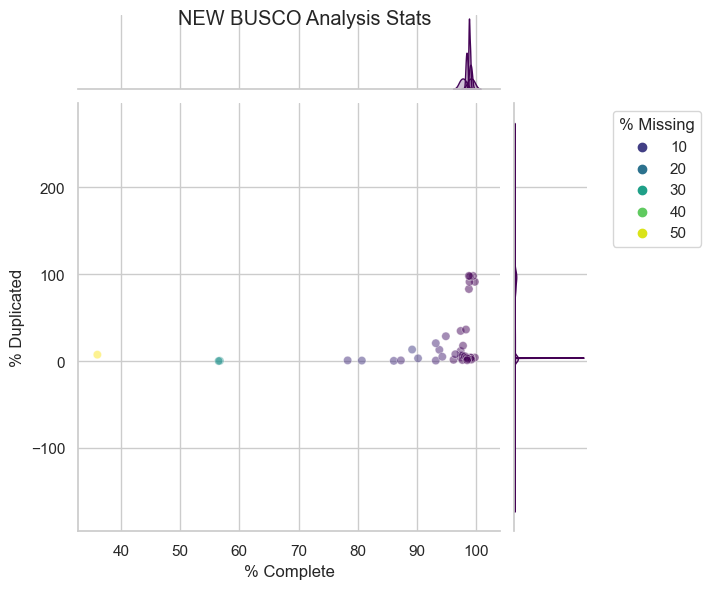

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt
# import ternary
sns.set(style="whitegrid")

# fig, axes = plt.subplots(1, 1, figsize=(6,5))

# Scatter
sns.jointplot(data = merged2, x="Complete", y="Duplicated", hue="Missing", palette="viridis", alpha=0.5)

plt.suptitle("NEW BUSCO Analysis Stats")
plt.legend(title="% Missing", bbox_to_anchor=(1.25, 1), loc="upper left")
plt.xlabel("% Complete")
plt.ylabel("% Duplicated")
plt.savefig("Busco_jointplot_new.jpg")

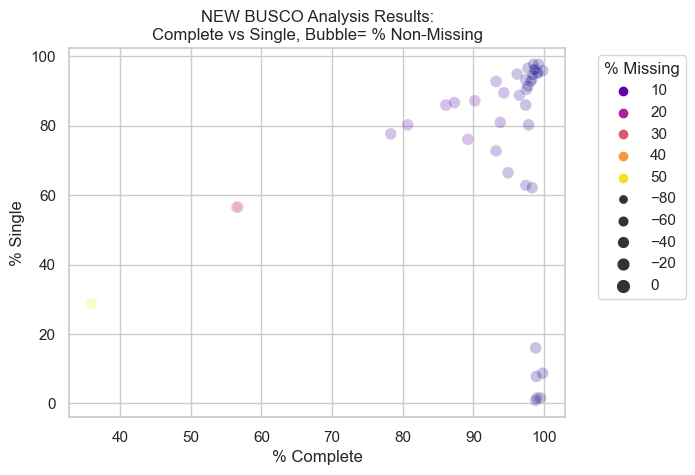

In [392]:
# Bubble chart 
sns.scatterplot(data = merged2,
                x="Complete",
                y="Single",
                size=1 - merged["Missing"],
                hue="Missing",
                palette="plasma",
                alpha=0.24)

plt.title("NEW BUSCO Analysis Results:\nComplete vs Single, Bubble= % Non-Missing")
plt.legend(title= "% Missing", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("% Complete")
plt.ylabel("% Single")

plt.savefig("Busco_scatter_new.jpg")
plt.show()

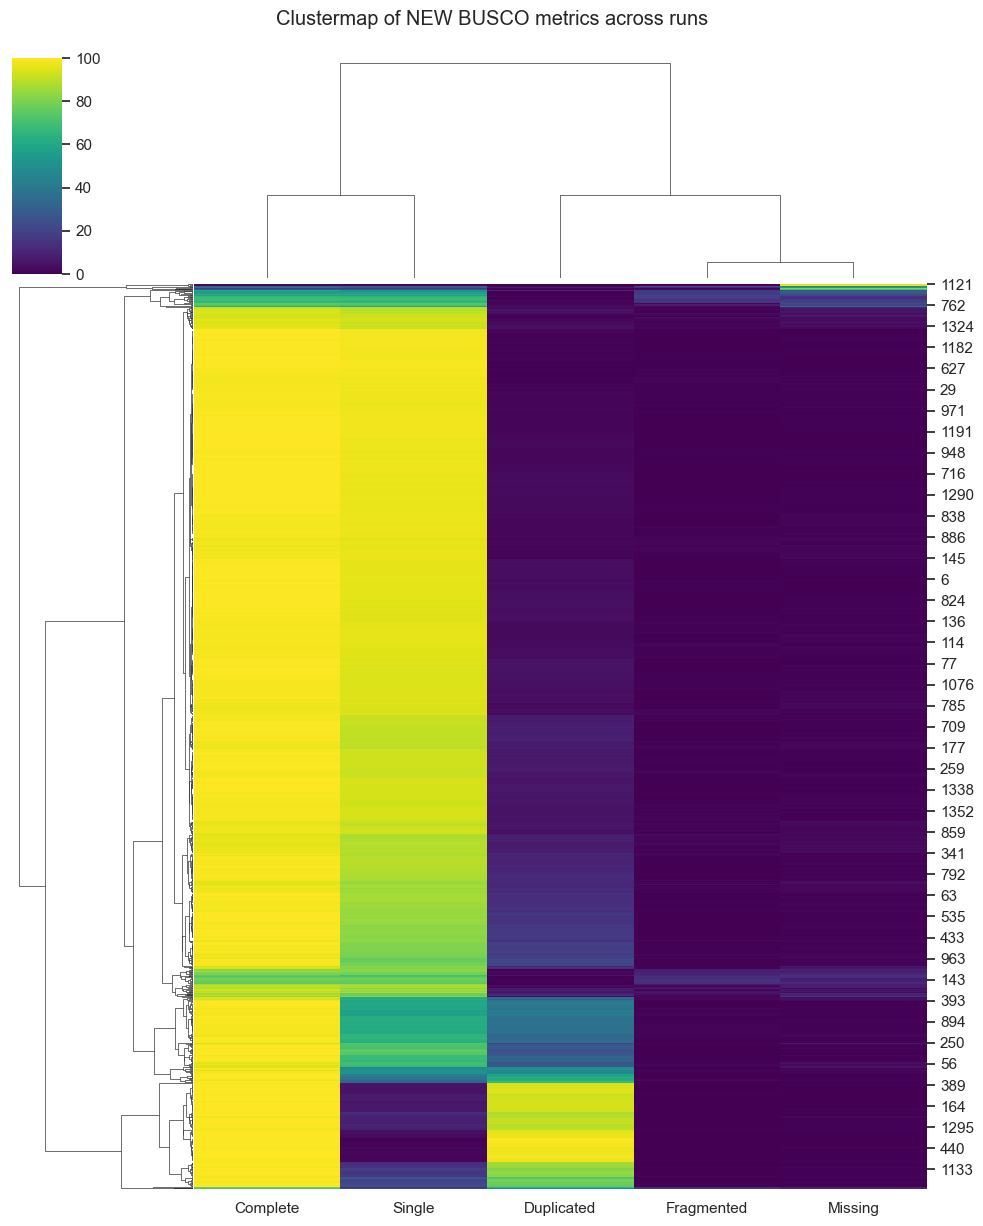

In [394]:
## Clustered Heatmap

sns.clustermap(
    stats2.iloc[:, 1:-1],
    metric="euclidean",
    method="average",
    cmap="viridis",
    figsize=(10,12)
)
plt.suptitle("Clustermap of NEW BUSCO metrics across runs", y=1.02)
plt.savefig("Busco_heatmap_new.jpg")
plt.show()

## Combine with Taxonomy Data

In [17]:
# Combine the Stats with previous data

# Define file path and load dataset
file_path = "C:/users/truma/Documents/snake_busco/Metadata_taxonomy.csv"
with open(file_path, encoding='utf8', errors='ignore') as buffer:
    taxonomy = pd.read_csv(buffer)

# Rename IDs column
taxonomy.columns = ["ID" if col.startswith("NCBI") else col for col in taxonomy.columns]
# Select ID column and species name/taxonomic columns
cols = ["ID", "Species name", "genus", "family", "order", "class", "phylum", "group name"]

taxonomy = taxonomy[cols]

print(taxonomy.head())

# Merge with the stats dataset
joined_df = stats.join(taxonomy[cols].set_index("ID"), on="ID")

counts = joined_df.groupby("order").Complete.describe()
counts = counts[counts["count"] > 2].sort_values("count")
counts

                ID                 Species name       genus      family  \
0  GCA_040256815.2            Triticum aestivum    Triticum     Poaceae   
1  GCA_046630445.1  Rutidosis leptorrhynchoides   Rutidosis  Asteraceae   
2  GCA_964340505.1          Alopecurus aequalis  Alopecurus     Poaceae   
3  GCA_950022295.1              Bromus sterilis      Bromus     Poaceae   
4  GCA_039583335.1               Lactuca sativa     Lactuca  Asteraceae   

       order          class        phylum group name  
0     Poales  Magnoliopsida  Streptophyta   monocots  
1  Asterales  Magnoliopsida  Streptophyta   eudicots  
2     Poales  Magnoliopsida  Streptophyta   monocots  
3     Poales  Magnoliopsida  Streptophyta   monocots  
4  Asterales  Magnoliopsida  Streptophyta   eudicots  


,count,mean,std,min,25%,50%,75%,max
order,,,,,,,,
Arecales,3.0,98.100000,1.200000,96.9,97.500,98.10,98.700,99.3
Sphaeropleales,3.0,68.533333,3.608786,66.4,66.450,66.50,69.600,72.7
Polypodiales,3.0,94.600000,2.816026,91.5,93.400,95.30,96.150,97.0
Prasiolales,3.0,57.733333,5.248174,52.0,55.450,58.90,60.600,62.3
Santalales,3.0,98.733333,0.737111,97.9,98.450,99.00,99.150,99.3
Mamiellales,3.0,63.166667,28.652109,30.6,52.500,74.40,79.450,84.5
Geraniales,4.0,99.600000,0.216025,99.3,99.525,99.65,99.725,99.8
Dioscoreales,4.0,98.800000,0.439697,98.3,98.525,98.80,99.075,99.3
Proteales,4.0,96.450000,2.554082,93.4,94.825,96.80,98.425,98.8


C:\Users\truma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


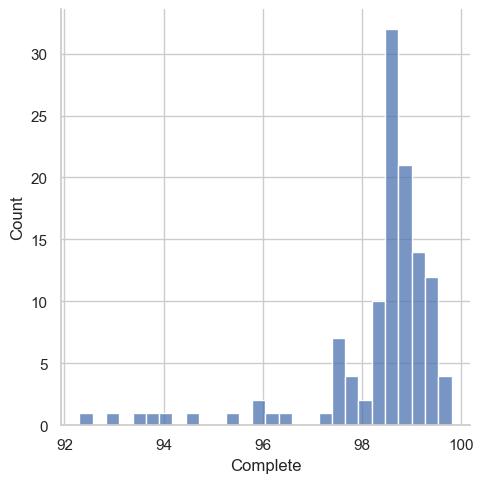

In [18]:
## Plot the distribution of counts of Order Poales

sns.displot(joined_df[(joined_df.order=="Rosales")&(joined_df.Complete > 10)], x="Complete")

Assign a new column for if our column should be cutoff
- True for should be cut off
- False for should not be cut off

In [39]:
# Assign cutoff for members below 98% complete to True
joined_df["Busco_cutoff"] = False
# joined_df["Busco_cutoff"] = (joined_df.order=="Rosales")&(joined_df.Complete <= 98.0)|(joined_df.Busco_cutoff)
joined_df[joined_df.Busco_cutoff]

,ID,Complete,Single,Duplicated,Fragmented,Missing,Total,Species name,genus,family,order,class,phylum,group name,Busco_cutoff


In [45]:
# Assign cutoff for members 2% below complete max to True
counts = joined_df.groupby("order").Complete.describe()
counts = counts[counts["count"] > 2].sort_values("count")
joined_df["Busco_cutoff"] = False

for order in counts.index.astype('str'):
    percent_cutoff = counts.loc[order, "max"] - 2
    joined_df["Busco_cutoff"] = (joined_df.order==order)&(joined_df.Complete <= percent_cutoff)|(joined_df.Busco_cutoff)
joined_df[joined_df.Busco_cutoff].sort_values("Complete")

,ID,Complete,Single,Duplicated,Fragmented,Missing,Total,Species name,genus,family,order,class,phylum,group name,Busco_cutoff
1205,GCA_964027155.1,0.9,0.7,0.2,0.0,99.1,425,Secale cereale,Secale,Poaceae,Poales,Magnoliopsida,Streptophyta,monocots,True
1067,GCA_914767515.2,1.6,1.4,0.2,1.2,97.2,425,Dunaliella primolecta,Dunaliella,Dunaliellaceae,Chlamydomonadales,Chlorophyceae,Chlorophyta,green algae,True
1092,GCA_947076115.1,3.3,3.3,0.0,1.2,95.5,425,Pisum sativum,Pisum,Fabaceae,Fabales,Magnoliopsida,Streptophyta,eudicots,True
1140,GCA_958450355.1,3.6,3.1,0.5,0.7,95.7,425,Agrostemma githago,Agrostemma,Caryophyllaceae,Caryophyllales,Magnoliopsida,Streptophyta,eudicots,True
67,GCA_010119955.1,18.3,17.4,0.9,0.9,80.8,425,Papaver somniferum,Papaver,Papaveraceae,Ranunculales,Magnoliopsida,Streptophyta,flowering plants,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,GCA_030180135.1,97.8,68.2,29.6,0.5,1.7,425,Orychophragmus violaceus,Orychophragmus,Brassicaceae,Brassicales,Magnoliopsida,Streptophyta,eudicots,True
883,GCA_042480485.1,97.9,93.9,4.0,0.7,1.4,425,Vriesea erythrodactylon,Vriesea,Bromeliaceae,Poales,Magnoliopsida,Streptophyta,monocots,True
211,GCA_019925245.2,97.9,96.0,1.9,0.9,1.2,425,Oryza australiensis,Oryza,Poaceae,Poales,Magnoliopsida,Streptophyta,monocots,True
457,GCA_029884595.2,97.9,92.5,5.4,0.2,1.9,425,Ormosia semicastrata,Ormosia,Fabaceae,Fabales,Magnoliopsida,Streptophyta,eudicots,True


In [127]:
# Save the JOINED and filtered result as a csv

filepath = 'truman_busco_results_stats_summary.csv'

write_csv(data=joined_df, filepath=filepath, dataname='joined_df')

joined_df Dataframe saved as truman_busco_results_stats_summary.csv.


## Find Duplicates 

In [68]:
## Find duplicate species for assemblies that did not pass busco cutoff for re-assessment

# Define file path and load dataset
file_path = "C:/users/truma/Documents/snake_busco/Metadata_taxonomy.tsv"
with open(file_path, encoding='utf8', errors='ignore') as buffer:
    taxonomy_tsv = pd.read_csv(buffer, sep='\t')

taxonomy_tsv.columns = ['Assembly name', 'version', 'Species', 'Common name', 'Ploidy=Chr',
       'haplotype', 'ID', 'Link (download)',
       'assembly quality (ie: Gold  draft  etc)', 'Sequencer Reads',
       'Assembly Method', 'Total Length (bp)', 'N50 Length (bp)', 'L50 (#)',
       'Contig (#)', 'Number of Gaps', 'genus', 'family', 'order', 'class',
       'phylum', 'group name', 'Link (FTP)', 'Publication (PUBMED ID)']

taxonomy_tsv.info()
taxonomy_tsv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Assembly name                            2907 non-null   object 
 1   version                                  0 non-null      float64
 2   Species                                  2907 non-null   object 
 3   Common name                              1709 non-null   object 
 4   Ploidy=Chr                               2907 non-null   object 
 5   haplotype                                2907 non-null   object 
 6   ID                                       2907 non-null   object 
 7   Link (download)                          2907 non-null   object 
 8   assembly quality (ie: Gold  draft  etc)  2907 non-null   object 
 9   Sequencer Reads                          2777 non-null   object 
 10  Assembly Method                          2781 no

,Assembly name,version,Species,Common name,Ploidy=Chr,haplotype,ID,Link (download),assembly quality (ie: Gold draft etc),Sequencer Reads,...,Contig (#),Number of Gaps,genus,family,order,class,phylum,group name,Link (FTP),Publication (PUBMED ID)
0,cbHetHete15.1,NaN,Heterocladium heteropterum,NaN,2n=,haploid,GCA_964605405.1,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Chromosome,PacBio Arima2,...,1361,NaN,Heterocladium,Pterigynandraceae,Hypnales,Bryopsida,Streptophyta,mosses,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/9...,na
1,ACO_r3.0C,NaN,Ananas comosus,pineapple,2n=,haploid,GCA_022834675.1,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Contig,Sequel,...,1909,NaN,Ananas,Bromeliaceae,Poales,Magnoliopsida,Streptophyta,monocots,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,35122338
2,ASM2231669v1,NaN,Camellia oleifera,abura-tsubaki,2n=,haploid,GCA_022316695.1,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Chromosome,PacBio Sequel,...,7266,NaN,Camellia,Theaceae,Ericales,Magnoliopsida,Streptophyta,eudicots,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,35012630
3,dcPolMari1.1,NaN,Polygonum maritimum,NaN,2n=,haploid,GCA_963924305.1,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Chromosome,PacBio Arima2,...,725,NaN,Polygonum,Polygonaceae,Caryophyllales,Magnoliopsida,Streptophyta,eudicots,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/9...,na
4,ASM3785540v1,NaN,Chlorella vulgaris,NaN,2n=,haploid,GCA_037855405.1,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Contig,PacBio Sequel IIe,...,91,NaN,Chlorella,Chlorellaceae,Chlorellales,Trebouxiophyceae,Chlorophyta,green algae,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,na


In [129]:
# subset rows containing duplicates
print(taxonomy_tsv.Species)

cutoffs_species = joined_df['Species name'][joined_df.Busco_cutoff] # find cutoff species
cutoffs_ids = joined_df.ID[joined_df.Busco_cutoff] # find cutoff assemblies

cutoffs_df = taxonomy_tsv[taxonomy_tsv.Species.isin(cutoffs_species)&~taxonomy_tsv.ID.isin(cutoffs_ids)] # subset cutoff species in tsv table
cutoffs_df = cutoffs_df.sort_values(['Species', 'N50 Length (bp)'], ascending=[True, False])
cutoffs_df.drop_duplicates(subset=['Species'], inplace=True, ignore_index=True)
# cutoffs_df = cutoffs_df.sort_values('Species')
print(cutoffs_df)

# write to a tsv file
filepath = 'metadata_busco_cutoff.csv'

write_csv(data=cutoffs_df, filepath=filepath, dataname='cutoffs_df')

0        Heterocladium heteropterum
1                    Ananas comosus
2                 Camellia oleifera
3               Polygonum maritimum
4                Chlorella vulgaris
                   ...             
2902                 Lactuca sativa
2903                Bromus sterilis
2904            Alopecurus aequalis
2905    Rutidosis leptorrhynchoides
2906              Triticum aestivum
Name: Species, Length: 2907, dtype: object
                       Assembly name  version  \
0                       dcAgrGith1.1      NaN   
1                       ASM3757648v1      NaN   
2                       ddAndSaus6.1      NaN   
3                  dmAquVulg1.hap1.1      NaN   
4                    ddArbMenz1_a1.1      NaN   
5   drPotAnse1.1 alternate haplotype      NaN   
6                       ASM3951918v1      NaN   
7                     lpBroTect1.0.a      NaN   
8                  ddCalVulg4.hap2.1      NaN   
9                       ASM2053656v1      NaN   
10                 lpC

In [131]:
print(cutoffs_df.Species.value_counts())

Species
Agrostemma githago                 1
Pisum sativum                      1
Iris macrosiphon                   1
Lamium amplexicaule                1
Linanthus parryae                  1
Lolium multiflorum                 1
Malus coronaria                    1
Malus orientalis                   1
Oemleria cerasiformis              1
Papaver somniferum                 1
Pentaglottis sempervirens          1
Phyllospadix torreyi               1
Pleodorina starrii                 1
Ammopiptanthus mongolicus          1
Polygonum aviculare                1
Prototheca wickerhamii             1
Prototheca zopfii                  1
Prunus armeniaca                   1
Prunus mira                        1
Prunus salicina                    1
Rosa agrestis                      1
Rosa canina                        1
Salix dunnii                       1
Urtica dioica                      1
Inga laurina                       1
Hypericum androsaemum              1
Gossypium longicalyx          

In [133]:
## Save non-cutoff species in new df

# select non-cutoffs
noncutoffs_species = joined_df['Species name'][~joined_df.Busco_cutoff]
# cutoffs_ids = joined_df.ID[joined_df.Busco_cutoff] # find cutoff assemblies

noncutoffs_df = taxonomy_tsv[taxonomy_tsv.Species.isin(noncutoffs_species)&taxonomy_tsv.ID.isin(joined_df.ID)] # subset cutoff species in tsv table
noncutoffs_df = noncutoffs_df.sort_values(['Species', 'N50 Length (bp)'], ascending=[True, False])
noncutoffs_df.drop_duplicates(subset=['Species'], inplace=True, ignore_index=True)

print(noncutoffs_df)

# write to a tsv file
filepath = 'metadata_busco_non-cutoff.csv'
write_csv(noncutoffs_df, filepath, 'noncutoffs_df')

       Assembly name  version                               Species  \
0        WUR_AEscu_1      NaN                Abelmoschus esculentus   
1         Abrus_2018      NaN                     Abrus precatorius   
2       ASM2363444v1      NaN  Abrus pulchellus subsp. cantoniensis   
3       ASM1902265v1      NaN                      Acacia acuminata   
4       ASM3707449v1      NaN                        Acacia confusa   
...              ...      ...                                   ...   
1166    ASM3175591v1      NaN                       Ziziphus jujuba   
1167    ASM3711354v1      NaN          Ziziphus jujuba var. spinosa   
1168  BJFU_zoysia2.1      NaN                       Zoysia japonica   
1169     CNU_Zsg_1.0      NaN                         Zoysia sinica   
1170    ASM4014439v1      NaN                    [Myrmecia] bisecta   

          Common name Ploidy=Chr haplotype               ID  \
0      lady's-fingers        2n=   haploid  GCA_035048815.1   
1     Indian licorice

## Reevaluate New Stats

In [412]:
# Restore stats2 to full list of new stats
stats2 = extract_busco_summary(dict_paths, stats)
stats2.info()
"""RangeIndex: 1374 entries, 0 to 1373"""

# Merge with the taxonomy tsv dataset
joined_df = stats2.join(taxonomy_tsv[cols].set_index("ID"), on="ID")
counts = joined_df.groupby("order").Missing.describe()
counts = counts[counts["count"] > 2].sort_values("count")
counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1374 non-null   object 
 1   Complete    1374 non-null   float64
 2   Single      1374 non-null   float64
 3   Duplicated  1374 non-null   float64
 4   Fragmented  1374 non-null   float64
 5   Missing     1374 non-null   float64
 6   Total       1374 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 75.3+ KB


,count,mean,std,min,25%,50%,75%,max
order,,,,,,,,
Arecales,3.0,0.800000,0.793725,0.2,0.350,0.50,1.100,1.7
Mamiellales,3.0,24.433333,21.239193,6.3,12.750,19.20,33.500,47.8
Sphaeropleales,3.0,15.533333,3.354599,13.4,13.600,13.80,16.600,19.4
Polypodiales,3.0,1.566667,0.763763,0.9,1.150,1.40,1.900,2.4
Santalales,3.0,0.933333,1.021437,0.2,0.350,0.50,1.300,2.1
Prasiolales,3.0,23.133333,6.357148,18.6,19.500,20.40,25.400,30.4
Geraniales,4.0,0.350000,0.129099,0.2,0.275,0.35,0.425,0.5
Proteales,4.0,2.150000,1.989137,0.5,0.500,1.80,3.450,4.5
Dioscoreales,4.0,1.025000,0.386221,0.5,0.875,1.10,1.250,1.4


In [430]:
joined_df.Missing[joined_df["order"].str.contains("Treb").replace(np.NaN, False)]

807      9.2
814     11.8
965     13.2
966     13.2
1228    21.2
Name: Missing, dtype: float64

In [426]:
joined_df.loc[3]

ID                             GCA_000258705.1
Complete                                  73.9
Single                                    73.9
Duplicated                                 0.0
Fragmented                                13.2
Missing                                   12.9
Total                                      425
Species name    Coccomyxa subellipsoidea C-169
genus                                Coccomyxa
family                                     NaN
order                                      NaN
class                         Trebouxiophyceae
phylum                             Chlorophyta
group name                         green algae
Name: 3, dtype: object

In [ ]:
# Assign cutoff for members below 98% complete to True
joined_df["Busco_cutoff"] = False
for order in counts.index.astype('str'):
    percent_cutoff = counts.loc[order, "max"] - 2
    joined_df["Busco_cutoff"] = (joined_df.order==order)&(joined_df.Complete <= percent_cutoff)|(joined_df.Busco_cutoff)
joined_df.sort_values("Missing", inplace = True)
print(joined_df.head())
print(joined_df[joined_df.Busco_cutoff])

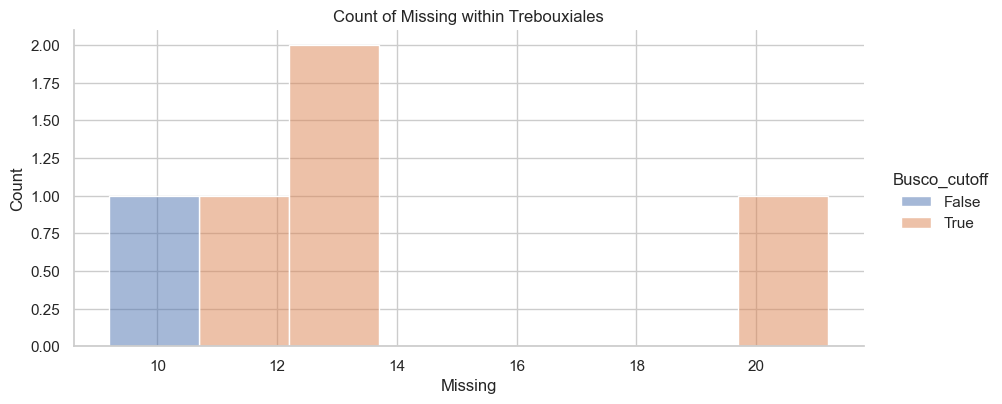

In [410]:
# fig, ax = plt.subplots(figsize=(54, 12))
def plot_order(order, metric):  
    sns.displot(joined_df[(joined_df.order==order)&(joined_df.Complete > 10)], x=metric, hue="Busco_cutoff", height=4, aspect=2.25)
    plt.title(f"Count of {metric} within {order}")
    plt.savefig(f"Histogram_{order}_Count_{metric}.jpg")
    plt.show()
plot_order("Trebouxiales", "Missing")


In [336]:
# save to a file

filename = "metadata_busco_cutoff_new.csv"

write_csv(joined_df, filename)

data Dataframe saved as metadata_busco_cutoff_new.csv.


## Scratch

In [318]:
taxonomy_tsv.columns

Index(['Assembly name', 'version', 'Species name', 'Common name', 'Ploidy=Chr',
       'haplotype', 'ID', 'Link (download)',
       'assembly quality (ie: Gold  draft  etc)', 'Sequencer Reads',
       'Assembly Method', 'Total Length (bp)', 'N50 Length (bp)', 'L50 (#)',
       'Contig (#)', 'Number of Gaps', 'genus', 'family', 'order', 'class',
       'phylum', 'group name', 'Link (FTP)', 'Publication (PUBMED ID)'],
      dtype='object')

In [85]:
csv.writer??

Docstring:
csv_writer = csv.writer(fileobj [, dialect='excel']
                            [optional keyword args])
    for row in sequence:
        csv_writer.writerow(row)

    [or]

    csv_writer = csv.writer(fileobj [, dialect='excel']
                            [optional keyword args])
    csv_writer.writerows(rows)

The "fileobj" argument can be any object that supports the file API.
Type:      builtin_function_or_method

In [18]:
stats.iloc[:, 1:]

,Complete,Single,Duplicated,Fragmented,Missing,Total
0,99.5,98.1,1.4,0.2,0.3,425
1,99.1,79.3,19.8,0.0,0.9,425
2,99.5,98.6,0.9,0.2,0.3,425
3,73.9,73.9,0.0,13.2,12.9,425
4,98.6,94.6,4.0,0.5,0.9,425
...,...,...,...,...,...,...
1329,99.0,96.2,2.8,0.7,0.3,425
1330,99.3,96.5,2.8,0.5,0.2,425
1331,94.6,91.8,2.8,1.4,4.0,425
1332,98.8,1.6,97.2,0.7,0.5,425


In [19]:
merged[merged["Missing"] >= 80]

,ID,Species name,Complete,Single,Duplicated,Fragmented,Missing,Total
67,GCA_010119955.1,Papaver somniferum,18.3,17.4,0.9,0.9,80.8,425
1067,GCA_914767515.2,Dunaliella primolecta,1.6,1.4,0.2,1.2,97.2,425
1092,GCA_947076115.1,Pisum sativum,3.3,3.3,0.0,1.2,95.5,425
1140,GCA_958450355.1,Agrostemma githago,3.6,3.1,0.5,0.7,95.7,425
1205,GCA_964027155.1,Secale cereale,0.9,0.7,0.2,0.0,99.1,425


In [20]:
merged.sort_values("Species name")

,ID,Species name,Complete,Single,Duplicated,Fragmented,Missing,Total
638,GCA_035048815.1,Abelmoschus esculentus,99.8,4.0,95.8,0.0,0.2,425
29,GCA_003935025.1,Abrus precatorius,98.8,97.9,0.9,0.2,1.0,425
304,GCA_023634445.1,Abrus pulchellus subsp. cantoniensis,99.3,97.9,1.4,0.5,0.2,425
177,GCA_019022655.1,Acacia acuminata,99.3,90.6,8.7,0.2,0.5,425
701,GCA_037074495.1,Acacia confusa,99.3,97.2,2.1,0.0,0.7,425
...,...,...,...,...,...,...,...,...
806,GCA_040438285.1,Zoysia japonica,99.1,86.4,12.7,0.7,0.2,425
869,GCA_041753855.1,Zoysia sinica,99.6,88.5,11.1,0.2,0.2,425
791,GCA_040144395.1,[Myrmecia] bisecta,77.4,76.7,0.7,13.4,9.2,425
718,GCA_037177595.1,NaN,98.6,63.5,35.1,0.7,0.7,425


In [21]:
stats = df.drop(df.index, axis=0)
data = {
            'Complete': float(93.1),
            'Single': float(88.7),
            'Duplicated': float(4.4),
            'Fragmented': float(2.0),
            'Missing': float(4.9),
            'Total': int(425)
        }
temp = pd.DataFrame([data])

stats = pd.concat([df, temp], axis=0
                 )
stats

,ID,Complete,Single,Duplicated,Fragmented,Missing,Total
0,GCA_965119375.1,99.5,23.5,76.0,0.2,0.3,425
0,NaN,93.1,88.7,4.4,2.0,4.9,425


In [22]:
# import numpy as np

nan_array = np.full(stats.shape, np.nan)
print(nan_array)
nan_series = pd.DataFrame(nan_array, columns = stats.columns)

pd.concat([stats, pd.DataFrame([{'ID': 'GCA_000231095.3'}])], axis=0, ignore_index=True)

[[nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]]


,ID,Complete,Single,Duplicated,Fragmented,Missing,Total
0,GCA_965119375.1,99.5,23.5,76.0,0.2,0.3,425.0
1,NaN,93.1,88.7,4.4,2.0,4.9,425.0
2,GCA_000231095.3,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})

# Create a NumPy array filled with NaNs
nan_array = np.full((2, df.shape[1]), np.nan)

# Convert the NumPy array to a DataFrame
nan_df = pd.DataFrame(nan_array, columns=df.columns)

# Concatenate the original DataFrame and the new DataFrame with NaNs
result = pd.concat([df, nan_df], ignore_index=True)

print(result)


     A    B
0  1.0  3.0
1  2.0  4.0
2  NaN  NaN
3  NaN  NaN


In [24]:
merged[merged["Complete"] < 90.0]

,ID,Species name,Complete,Single,Duplicated,Fragmented,Missing,Total
3,GCA_000258705.1,Coccomyxa subellipsoidea C-169,73.9,73.9,0.0,13.2,12.9,425
18,GCA_002245815.2,Micractinium conductrix,82.4,81.9,0.5,8.7,8.9,425
55,GCA_009193075.1,Mychonastes homosphaera,66.5,65.6,0.9,14.1,19.4,425
57,GCA_009650465.1,Picochlorum sp. BH-2019,65.6,64.7,0.9,15.8,18.6,425
67,GCA_010119955.1,Papaver somniferum,18.3,17.4,0.9,0.9,80.8,425
...,...,...,...,...,...,...,...,...
1174,GCA_963854735.1,Marvania coccoides,88.7,87.8,0.9,4.2,7.1,425
1197,GCA_963969365.1,Asterochloris sp. CNOR1,61.6,61.6,0.0,17.2,21.2,425
1205,GCA_964027155.1,Secale cereale,0.9,0.7,0.2,0.0,99.1,425
1235,GCA_964187115.1,Bathycoccus prasinos,30.6,29.2,1.4,21.6,47.8,425


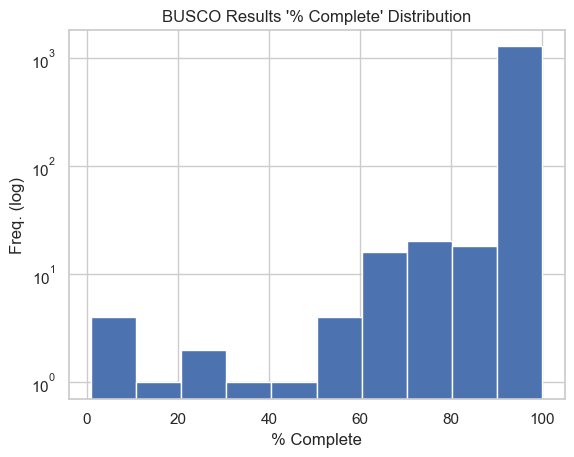

In [25]:
plt.hist(data=merged, x="Complete")
plt.yscale('log')
plt.title("BUSCO Results '% Complete' Distribution")
plt.xlabel("% Complete")
plt.ylabel("Freq. (log)")

plt.show()

In [90]:
merged

,ID,Species name,Complete,Single,Duplicated,Fragmented,Missing,Total
0,GCA_000004075.3,Cucumis sativus,99.5,98.1,1.4,0.2,0.3,425
1,GCA_000218505.1,Schrenkiella parvula,99.1,79.3,19.8,0.0,0.9,425
2,GCA_000231095.3,Oryza brachyantha,99.5,98.6,0.9,0.2,0.3,425
3,GCA_000258705.1,Coccomyxa subellipsoidea C-169,73.9,73.9,0.0,13.2,12.9,425
4,GCA_000338895.3,Oryza meridionalis,98.6,94.6,4.0,0.5,0.9,425
...,...,...,...,...,...,...,...,...
1329,GCA_965117945.1,Oryza barthii,99.0,96.2,2.8,0.7,0.3,425
1330,GCA_965117955.1,Oryza glaberrima x Oryza sativa,99.3,96.5,2.8,0.5,0.2,425
1331,GCA_965119335.1,Rosa canina,94.6,91.8,2.8,1.4,4.0,425
1332,GCA_965119345.1,Potentilla indica,98.8,1.6,97.2,0.7,0.5,425


In [100]:
stats

,ID,Complete,Single,Duplicated,Fragmented,Missing,Total
0,GCA_000004075.3,99.5,98.1,1.4,0.2,0.3,425
1,GCA_000218505.1,99.1,79.3,19.8,0.0,0.9,425
2,GCA_000231095.3,99.5,98.6,0.9,0.2,0.3,425
3,GCA_000258705.1,73.9,73.9,0.0,13.2,12.9,425
4,GCA_000338895.3,98.6,94.6,4.0,0.5,0.9,425
...,...,...,...,...,...,...,...
1329,GCA_965117945.1,99.0,96.2,2.8,0.7,0.3,425
1330,GCA_965117955.1,99.3,96.5,2.8,0.5,0.2,425
1331,GCA_965119335.1,94.6,91.8,2.8,1.4,4.0,425
1332,GCA_965119345.1,98.8,1.6,97.2,0.7,0.5,425


In [102]:
taxonomy

,Assembly name,version,Species name,Common name,Ploidy=Chr,haplotype,ID,Link (download),assembly quality (ie: Gold draft etc),Sequencer Reads,...,Contig (#),Number of Gaps,genus,family,order,class,phylum,group name,Link (FTP),Publication (PUBMED ID)
0,ASM4025681v2,NaN,Triticum aestivum,bread wheat,2n=,haploid,GCA_040256815.2,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Complete Genome,Illumina NovaSeq; PacBio; Oxford Nanopore Prom...,...,21,NaN,Triticum,Poaceae,Poales,Magnoliopsida,Streptophyta,monocots,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN
1,CSIRO_AGI_Rlap_v1,NaN,Rutidosis leptorrhynchoides,NaN,2n=,haploid,GCA_046630445.1,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Chromosome,PacBio Sequel; Oxford Nanopore PromethION; Ill...,...,550,NaN,Rutidosis,Asteraceae,Asterales,Magnoliopsida,Streptophyta,eudicots,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN
2,Alaeq_EIv0.2,NaN,Alopecurus aequalis,NaN,2n=,haploid,GCA_964340505.1,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Chromosome,PacBio,...,164,NaN,Alopecurus,Poaceae,Poales,Magnoliopsida,Streptophyta,monocots,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/9...,NaN
3,lpBroSter1.1,NaN,Bromus sterilis,poverty brome,2n=,haploid,GCA_950022295.1,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Chromosome,PacBio Arima2,...,359,NaN,Bromus,Poaceae,Poales,Magnoliopsida,Streptophyta,monocots,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/9...,NaN
4,cutv01,NaN,Lactuca sativa,garden lettuce,2n=,haploid,GCA_039583335.1,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Chromosome,PacBio HiFi; Oxford Nanopore technology,...,10,NaN,Lactuca,Asteraceae,Asterales,Magnoliopsida,Streptophyta,eudicots,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,ASM1418256v1,NaN,Eucalyptus marginata,NaN,2n=,haploid,GCA_014182565.1,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Chromosome,Oxford Nanopore MinION,...,989,NaN,Eucalyptus,Myrtaceae,Myrtales,Magnoliopsida,Streptophyta,eudicots,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN
1337,dcPolMari1.1,NaN,Polygonum maritimum,NaN,2n=,haploid,GCA_963924305.1,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Chromosome,PacBio Arima2,...,725,NaN,Polygonum,Polygonaceae,Caryophyllales,Magnoliopsida,Streptophyta,eudicots,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/9...,NaN
1338,ASM2231669v1,NaN,Camellia oleifera,abura-tsubaki,2n=,haploid,GCA_022316695.1,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Chromosome,PacBio Sequel,...,7266,NaN,Camellia,Theaceae,Ericales,Magnoliopsida,Streptophyta,eudicots,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,35012630
1339,ACO_r3.0C,NaN,Ananas comosus,pineapple,2n=,haploid,GCA_022834675.1,https://www.ncbi.nlm.nih.gov/datasets/genome/G...,Contig,Sequel,...,1909,NaN,Ananas,Bromeliaceae,Poales,Magnoliopsida,Streptophyta,monocots,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,35122338


In [148]:
cols = ["ID", "Species name", "genus", "family", "order", "class", "phylum", "group name"]
temp = stats.join(taxonomy[cols].set_index("ID"), on="ID")

counts = temp.groupby("order").Complete.describe()
counts[counts["count"] > 2].sort_values("count")

# import seaborn

# seaborn.displot(temp[(temp.order=="Poales")&(temp.Complete > 10)], x="Complete")

,count,mean,std,min,25%,50%,75%,max
order,,,,,,,,
Arecales,3.0,98.100000,1.200000,96.9,97.500,98.10,98.700,99.3
Sphaeropleales,3.0,68.533333,3.608786,66.4,66.450,66.50,69.600,72.7
Polypodiales,3.0,94.600000,2.816026,91.5,93.400,95.30,96.150,97.0
Prasiolales,3.0,57.733333,5.248174,52.0,55.450,58.90,60.600,62.3
Santalales,3.0,98.733333,0.737111,97.9,98.450,99.00,99.150,99.3
Mamiellales,3.0,63.166667,28.652109,30.6,52.500,74.40,79.450,84.5
Geraniales,4.0,99.600000,0.216025,99.3,99.525,99.65,99.725,99.8
Dioscoreales,4.0,98.800000,0.439697,98.3,98.525,98.80,99.075,99.3
Proteales,4.0,96.450000,2.554082,93.4,94.825,96.80,98.425,98.8


In [251]:
merged2.sort_values('Complete')

,ID,Species name,Complete,Single,Duplicated,Fragmented,Missing,Total
875,GCA_041430165.1,NaN,36.0,28.7,7.3,11.1,52.9,425
1095,GCA_914767535.2,NaN,56.5,56.5,0.0,16.5,27.0,425
1029,GCA_046862625.1,NaN,56.7,56.5,0.2,16.7,26.6,425
86,GCA_013389655.1,NaN,78.3,77.6,0.7,14.1,7.6,425
497,GCA_030267485.1,NaN,80.7,80.2,0.5,10.8,8.5,425
640,GCA_034642185.1,NaN,86.1,85.9,0.2,6.4,7.5,425
748,GCA_037855405.1,NaN,87.3,86.6,0.7,6.8,5.9,425
293,GCA_023055565.1,NaN,89.2,76.0,13.2,1.2,9.6,425
913,GCA_042919835.1,NaN,90.2,87.1,3.1,1.2,8.6,425
1000,GCA_046127735.1,NaN,93.2,92.7,0.5,1.2,5.6,425


In [259]:
# Combine the New Stats with previous data to produce graph

# remove duplicates within new stats data
stats2 = stats2[~stats2.ID.isin(stats.ID)]

# Merge with the stats dataset
merged2 = primary.join(stats2.set_index("ID"), on="ID", how="right")

# # remove duplicates within merged data
# merged2 = merged2[~merged2.ID.isin(merged.ID)]

merged2.head()

,ID,Species name,Complete,Single,Duplicated,Fragmented,Missing,Total
NaN,GCA_010119995.1,NaN,99.8,8.7,91.1,0.0,0.2,425
NaN,GCA_013389655.1,NaN,78.3,77.6,0.7,14.1,7.6,425
NaN,GCA_019343435.1,NaN,96.2,94.8,1.4,1.6,2.2,425
NaN,GCA_019972055.1,NaN,98.8,96.2,2.6,0.9,0.3,425
NaN,GCA_020226455.1,NaN,93.8,80.9,12.9,0.9,5.3,425


In [279]:
# Define file path and load dataset
file_path = "C:/users/truma/Documents/snake_busco/Metadata_taxonomy.tsv"
with open(file_path, encoding='utf8', errors='ignore') as buffer:
    taxonomy_tsv = pd.read_csv(buffer, sep='\t')

# Select ID column and species name column
primary = taxonomy_tsv[["NCBI GenBank ID", "Species name"]]
# Rename IDs column
primary.columns = ["ID", "Species name"]
print(primary.head())


primary[primary.ID.isin(stats2.ID)]

                ID                Species name
0  GCA_964605405.1  Heterocladium heteropterum
1  GCA_022834675.1              Ananas comosus
2  GCA_022316695.1           Camellia oleifera
3  GCA_963924305.1         Polygonum maritimum
4  GCA_037855405.1          Chlorella vulgaris


,ID,Species name
4,GCA_037855405.1,Chlorella vulgaris
25,GCA_030267485.1,Pleodorina starrii
51,GCA_046864825.1,Lolium multiflorum
76,GCA_964291885.1,Aquilegia vulgaris
121,GCA_041430165.1,Prototheca zopfii
216,GCA_020226455.1,Prunus salicina
232,GCA_019972055.1,Castanea crenata
263,GCA_039519185.1,Astragalus membranaceus
313,GCA_010119995.1,Papaver somniferum
328,GCA_020536565.1,Camellia sinensis var. assamica
